In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.colors as col
import matplotlib.cm as cm
import seaborn as sns
import re

%matplotlib notebook

In [187]:
data_fasilitas = pd.read_csv('jumlah-fasilitas-olahraga-menurut-jenisnya-tahun-2020.csv')
data_prestasi = pd.read_csv('rekapitulasi-prestasi-olahraga-diraih-th-2018.csv')

In [188]:
data_fasilitas

,kota/kabupaten,kecamatan,jenis_fasilitas_olahraga,jumlah
0,Jakarta Selatan,Cilandak,Atletik,1
1,Jakarta Selatan,Jagakarsa,Atletik,1
2,Jakarta Selatan,Kebayoran Baru,Atletik,2
3,Jakarta Selatan,Kebayoran Lama,Atletik,1
4,Jakarta Selatan,Mampang Prapatan,Atletik,1
...,...,...,...,...
465,Jakarta Utara,Koja,tenis meja,0
466,Jakarta Utara,Kelapa Gading,tenis meja,0
467,Jakarta Utara,Tanjung Priok,tenis meja,0
468,Jakarta Utara,Pademangan,tenis meja,0


In [189]:
data_1 = data_fasilitas.groupby(['jenis_fasilitas_olahraga']).sum()
data_1

,jumlah
jenis_fasilitas_olahraga,
Atletik,18
Bola Basket,58
Bola Voli,81
Bulutangkis,218
Golf,1
Sepakbola,47
kolam renang,20
stadion,12
tenis,42


In [190]:
data_prestasi

,bulan,cabang_olahraga,event_olahraga,nomor_pertandingan,nama_peraih_medali,medali,jumlah
0,5,Aquatic,Invitasi Aquatic 2018 (Loncat Indah dan Renang...,Various,Various,emas,30.0
1,5,Aquatic,Invitasi Aquatic 2018 (Loncat Indah dan Renang...,Various,Various,perak,30.0
2,5,Aquatic,Invitasi Aquatic 2018 (Loncat Indah dan Renang...,Various,Various,perunggu,30.0
3,10,Atletik,Kejuaraan AtletikTerbuka,Various,Atlet AtletikPelatda DKI,emas,40.0
4,10,Atletik,Kejuaraan AtletikTerbuka,Various,Atlet AtletikPelatda DKI,perak,40.0
...,...,...,...,...,...,...,...
373,8,Tenis Meja,Kejurnas Antar PPLP/D 2018,Beregu Putri,Atlet Bola Voli PPOP,perak,0.0
374,5,Tenis Meja,Kejuaraan Jurnalis Cup 2018,Tunggal Putra,Fernando,perunggu,0.0
375,5,Tenis Meja,Kejuaraan Jurnalis Cup 2018,Tunggal Putri,Desi Rahmadanti,perunggu,0.0
376,5,Tenis Meja,Kejuaraan Kepri Open 2018,Beregu Putra,David Jacob dan Fernando Palar,perunggu,0.0


In [191]:
data_2 = data_prestasi.drop(['bulan', 'nomor_pertandingan', 'event_olahraga', 'nama_peraih_medali'], axis = 1)

In [192]:
data_2 = data_2.groupby(['cabang_olahraga', 'medali']).sum()
data_2

jumlah
cabang_olahraga medali          
Aquatic         emas        30.0
                perak       30.0
                perunggu    30.0
Atletik         emas       355.0
                perak      347.0
                perunggu   331.0
Bola Basket     emas         0.0
                perak        1.0
                perunggu     0.0
Bola Voli       emas        31.0
                perak       32.0
                perunggu    30.0
Bulutangkis     emas        16.0
                perak       13.0
                perunggu    13.0
Golf            emas         2.0
                perak        1.0
                perunggu     0.0
Renang          emas       284.0
                perak      290.0
                perunggu   283.0
Sepakbola       emas         3.0
                perak        2.0
                perunggu     0.0
Tenis           emas        21.0
                perak       20.0
                perunggu    20.0
Tenis Meja      emas        14.0
                perak        6.0
                perunggu    10.0

In [193]:
data_2 = data_2.unstack(level=1)
data_2

jumlah                
medali            emas  perak perunggu
cabang_olahraga                       
Aquatic           30.0   30.0     30.0
Atletik          355.0  347.0    331.0
Bola Basket        0.0    1.0      0.0
Bola Voli         31.0   32.0     30.0
Bulutangkis       16.0   13.0     13.0
Golf               2.0    1.0      0.0
Renang           284.0  290.0    283.0
Sepakbola          3.0    2.0      0.0
Tenis             21.0   20.0     20.0
Tenis Meja        14.0    6.0     10.0

In [194]:
data_2 = data_2.droplevel(0, axis=1) 

In [195]:
data_2.columns

Index(['emas', 'perak', 'perunggu'], dtype='object', name='medali')

In [196]:
data_2.rename(columns = {'emas' : 'Gold', 'perak' : 'Silver', 'perunggu' : 'Bronze', 'medali' : 'Medal'}, inplace = True)
data_2.rename_axis('Sport', inplace = True)
data_2.rename_axis('Medal', axis='columns', inplace = True)
data_2

Medal,Gold,Silver,Bronze
Sport,,,
Aquatic,30.0,30.0,30.0
Atletik,355.0,347.0,331.0
Bola Basket,0.0,1.0,0.0
Bola Voli,31.0,32.0,30.0
Bulutangkis,16.0,13.0,13.0
Golf,2.0,1.0,0.0
Renang,284.0,290.0,283.0
Sepakbola,3.0,2.0,0.0
Tenis,21.0,20.0,20.0


In [197]:
data_2['Facility'] = data_1['jumlah']
data_2['Facility']['Aquatic'] = 20
data_2['Facility']['Renang'] = 20
data_2['Facility']['Tenis'] = 42
data_2['Facility']['Tenis Meja'] = 46
data_2

Medal,Gold,Silver,Bronze,Facility
Sport,,,,
Aquatic,30.0,30.0,30.0,20.0
Atletik,355.0,347.0,331.0,18.0
Bola Basket,0.0,1.0,0.0,58.0
Bola Voli,31.0,32.0,30.0,81.0
Bulutangkis,16.0,13.0,13.0,218.0
Golf,2.0,1.0,0.0,1.0
Renang,284.0,290.0,283.0,20.0
Sepakbola,3.0,2.0,0.0,47.0
Tenis,21.0,20.0,20.0,42.0


<IPython.core.display.Javascript object>


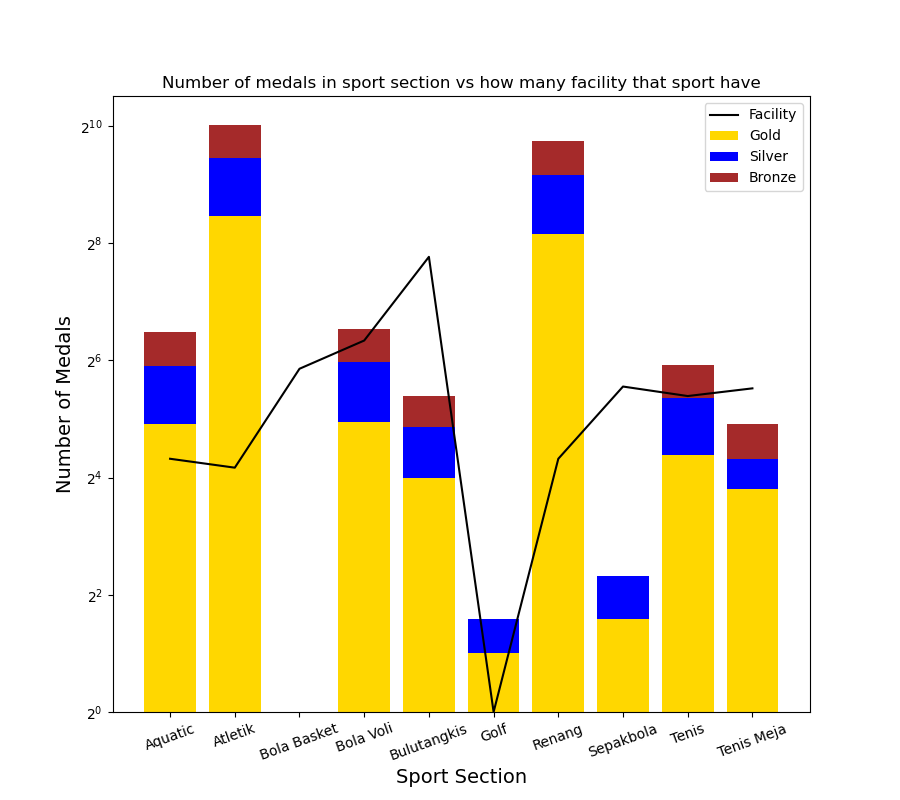

In [238]:
plt.figure(figsize=(9,8))
a = plt.bar(data_2.index, data_2['Gold'], color = 'gold', label = 'Gold')
b = plt.bar(data_2.index, data_2['Silver'], bottom = data_2['Gold'], color='blue', label = 'Silver')
c = plt.bar(data_2.index, data_2['Bronze'], bottom = data_2['Silver'] + data_2['Gold'], color='brown', label = 'Bronze')
d = plt.plot(data_2.index, data_2['Facility'], color = 'black', label = 'Facility')
plt.title('Number of Medals in sport section vs how many facility that sport have'.capitalize())
plt.ylabel('Number of Medals',fontsize=14)
plt.xlabel('Sport Section',fontsize=14)
plt.legend(loc="upper right")
plt.yscale('log',base=2) 
plt.xticks(rotation=20)
plt.savefig('Coursera-week4.png')